**PREPROCESSING**

In [ ]:
import pandas as pd
my_df = pd.read_csv('/content/LinkAja_preprocessing.csv')
my_df.head(2000)

,Review Text,Username,Rating
0,Muantapp 👍 1000x,Ffcs Ffcs,5
1,Saya sangat kecewa terhadap pihak link aja. Sa...,Ade Wijaya,1
2,LIVE CHAT TIDAK BERGUNA !!!!!!!! GANTI NOMOR T...,yt almar,1
3,Belum Daftar sudah dikirim kode verifikasi kee...,Syamsul Rizal,1
4,aplikasi sampahhh,Agus Maulana,1
...,...,...,...
1995,Knp dana sy tdk masuk,Ahmadilham Ilham,1
1996,Aplikasi nya Sangat lambat proses fuul service...,Khoerr Shotenn,1
1997,Aplikasi gak jelas,Agung s Baskara,2
1998,Sangat baik,Jen4n,3


# **CLEANING**

In [ ]:
import re

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    # Menghapus tanda baca dan simbol selain huruf dan spasi
    text = re.sub(r'[^\w\s]', '', text)
    # Menghapus spasi ekstra
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Menerapkan fungsi clean_text ke kolom 'Review Text'
my_df['Review Text'] = my_df['Review Text'].apply(clean_text)
# Menyimpan hasil setelah pembersihan
my_df[['Review Text', 'Username', 'Rating']].astype('str').to_csv("LinkAja_cleaned.csv", index=False)
# Menampilkan beberapa baris pertama
my_df.head(2000)

,Review Text,Username,Rating
0,Muantapp x,Ffcs Ffcs,5
1,Saya sangat kecewa terhadap pihak link aja Say...,Ade Wijaya,1
2,LIVE CHAT TIDAK BERGUNA GANTI NOMOR TIDAK BISA...,yt almar,1
3,Belum Daftar sudah dikirim kode verifikasi kee...,Syamsul Rizal,1
4,aplikasi sampahhh,Agus Maulana,1
...,...,...,...
1995,Knp dana sy tdk masuk,Ahmadilham Ilham,1
1996,Aplikasi nya Sangat lambat proses fuul service...,Khoerr Shotenn,1
1997,Aplikasi gak jelas,Agung s Baskara,2
1998,Sangat baik,Jen4n,3


# **CASE FOLDING**

**Case Folding**

Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [ ]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [ ]:
my_df['casefolding'] = my_df['Review Text'].str.lower()
my_df['casefolding']
data_clean = clean_text(my_df, 'Review Text', 'casefolding')
my_df.head()

,Review Text,Username,Rating,casefolding
0,Muantapp x,Ffcs Ffcs,5,muantapp x
1,Saya sangat kecewa terhadap pihak link aja Say...,Ade Wijaya,1,saya sangat kecewa terhadap pihak link aja say...
2,LIVE CHAT TIDAK BERGUNA GANTI NOMOR TIDAK BISA...,yt almar,1,live chat tidak berguna ganti nomor tidak bisa...
3,Belum Daftar sudah dikirim kode verifikasi kee...,Syamsul Rizal,1,belum daftar sudah dikirim kode verifikasi kee...
4,aplikasi sampahhh,Agus Maulana,1,aplikasi sampahhh


# **NORMALISASI**

In [ ]:
# Baca kamus kata tidak baku
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
my_df['casefolding'] = my_df['Review Text'].apply(lambda x: x.lower())

In [ ]:
import pandas as pd

# Fungsi untuk mengganti kata tidak baku dengan kata baku
def replace_taboo_words(text, kamus_tidak_baku):

    replaced_text = text  # Inisialisasi teks yang diganti
    kalimat_baku = []  # Inisialisasi list kalimat baku

    # Loop untuk mengganti kata-kata tidak baku
    for word in replaced_text.split():
        if word in kamus_tidak_baku:
            replaced_text = replaced_text.replace(word, kamus_tidak_baku[word])  # Ganti kata tidak baku dengan kata baku
            kalimat_baku.append(kamus_tidak_baku[word])  # Simpan kata baku
        else:
            kalimat_baku.append(word)  # Jika kata sudah baku, simpan apa adanya

    # Menggabungkan kalimat baku menjadi satu kalimat utuh
    kalimat_baku = ' '.join(kalimat_baku)

    # Kembalikan hasil penggantian dan kalimat baku
    return replaced_text, kalimat_baku

# Terapkan fungsi penggantian kata tidak baku pada kolom 'casefolding'
my_df['normalisasi'], my_df['Kata_Baku'] = zip(*my_df['casefolding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

# Membaca kolom yang diinginkan ke dalam DataFrame 'df'
my_df = pd.DataFrame(my_df[['Username', 'Rating', 'Review Text', 'casefolding', 'normalisasi']])

# Tampilkan beberapa baris pertama untuk memastikan
my_df.head()

,Username,Rating,Review Text,casefolding,normalisasi
0,Ffcs Ffcs,5,Muantapp x,muantapp x,mantap kali
1,Ade Wijaya,1,Saya sangat kecewa terhadap pihak link aja Say...,saya sangat kecewa terhadap pihak link aja say...,saya sangat kecewa terhadap pihak link saja sa...
2,yt almar,1,LIVE CHAT TIDAK BERGUNA GANTI NOMOR TIDAK BISA...,live chat tidak berguna ganti nomor tidak bisa...,live chat tidak berguna ganti nomor tidak bisa...
3,Syamsul Rizal,1,Belum Daftar sudah dikirim kode verifikasi kee...,belum daftar sudah dikirim kode verifikasi kee...,belum daftar sudah dikirim kode verifikasi ke ...
4,Agus Maulana,1,aplikasi sampahhh,aplikasi sampahhh,aplikasi sampah


# **TOKENIZING**

**Tokenizing**

Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [ ]:
import nltk
nltk.data.path = ['/root/nltk_data']  # Tentukan direktori yang tepat

In [ ]:
import pandas as pd
import re

# Fungsi untuk melakukan tokenisasi teks (menghapus tanda baca)
def tokenize_text(text):
    # Tokenisasi teks dengan regex untuk hanya mengambil kata (mengabaikan tanda baca apapun)
    return re.findall(r'\b\w+\b', text)

# Kolom 'text_tokenize' diisi dengan hasil tokenisasi yang sudah dibersihkan dari tanda baca
my_df['tokenize'] = my_df['normalisasi'].apply(tokenize_text)

# Menampilkan beberapa baris pertama untuk memeriksa hasilnya
my_df.head(2000)

NameError: name 'my_df' is not defined

# **STOPWORD REMOVAL**

**Stopword Removal**

Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya

In [ ]:
import nltk
import pandas as pd

# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load Indonesian stopwords and add custom words
stop = set(stopwords.words('indonesian'))  # Using a set for better performance
custom_stopwords = {"sih", "cs", "ya"}  # Add custom stopwords
stop.update(custom_stopwords)  # Merge with existing stopwords

# Assuming my_df['tokenize'] is already a list of tokens
# Filter stopwords but keep the list format
my_df['stopword'] = my_df['tokenize'].apply(lambda x: [word for word in x if word not in stop])

# Display first few rows
my_df.head(2000) # Adjust as needed


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Username,Rating,Review Text,casefolding,normalisasi,tokenize,stopword
0,Ffcs Ffcs,5,Muantapp x,muantapp x,mantap kali,"[mantap, kali]","[mantap, kali]"
1,Ade Wijaya,1,Saya sangat kecewa terhadap pihak link aja Say...,saya sangat kecewa terhadap pihak link aja say...,saya sangat kecewa terhadap pihak link saja sa...,"[saya, sangat, kecewa, terhadap, pihak, link, ...","[kecewa, link, isi, saldo, tanggal, kematin, k..."
2,yt almar,1,LIVE CHAT TIDAK BERGUNA GANTI NOMOR TIDAK BISA...,live chat tidak berguna ganti nomor tidak bisa...,live chat tidak berguna ganti nomor tidak bisa...,"[live, chat, tidak, berguna, ganti, nomor, tid...","[live, chat, berguna, ganti, nomor, aplikasiii..."
3,Syamsul Rizal,1,Belum Daftar sudah dikirim kode verifikasi kee...,belum daftar sudah dikirim kode verifikasi kee...,belum daftar sudah dikirim kode verifikasi ke ...,"[belum, daftar, sudah, dikirim, kode, verifika...","[daftar, dikirim, kode, verifikasi, email, ema..."
4,Agus Maulana,1,aplikasi sampahhh,aplikasi sampahhh,aplikasi sampah,"[aplikasi, sampah]","[aplikasi, sampah]"
...,...,...,...,...,...,...,...
1995,Ahmadilham Ilham,1,Knp dana sy tdk masuk,knp dana sy tdk masuk,kenapa dana saya tidak masuk,"[kenapa, dana, saya, tidak, masuk]","[dana, masuk]"
1996,Khoerr Shotenn,1,Aplikasi nya Sangat lambat proses fuul service...,aplikasi nya sangat lambat proses fuul service...,aplikasi ya sangat lambat proses fuul service ...,"[aplikasi, ya, sangat, lambat, proses, fuul, s...","[aplikasi, lambat, proses, fuul, service, memb..."
1997,Agung s Baskara,2,Aplikasi gak jelas,aplikasi gak jelas,aplikasi tidak jelas,"[aplikasi, tidak, jelas]",[aplikasi]
1998,Jen4n,3,Sangat baik,sangat baik,sangat baik,"[sangat, baik]",[]


# STEMMING

**Stemming**

Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stemmed function
def stemmed_wrapper(term):
    return stemmer.stem(term)

# Initialize dictionary to store terms and their stems
term_dict = {}
hitung = 0

# Loop through each document and extract unique terms
for document in my_df['stopword']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Print the total number of unique terms
print(len(term_dict))
print("------------------------")

# Apply stemming to each term and store it in term_dict
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

# Apply stemmed terms to the dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

# Create the 'steaming' column with terms separated by commas
my_df['stemming'] = my_df['stopword'].apply(lambda x: ', '.join(get_stemmed_term(x)))

# Display the dataframe
my_df.head(2000)

3895
------------------------
1 : mantap : mantap
2 : kali : kali
3 : kecewa : kecewa
4 : link : link
5 : isi : isi
6 : saldo : saldo
7 : tanggal : tanggal
8 : kematin : kematin
9 : kunjung : kunjung
10 : masuk : masuk
11 : live : live
12 : chat : chat
13 : upload : upload
14 : bukfi : bukfi
15 : teranferan : teranferan
16 : berguna : guna
17 : ganti : ganti
18 : nomor : nomor
19 : aplikasiiii : aplikasiiii
20 : merusakkkkkkkk : merusakkkkkkkk
21 : duit : duit
22 : digital : digital
23 : tertelan : tel
24 : aplikasi : aplikasi
25 : memalukan : malu
26 : aktiff : aktiff
27 : daftar : daftar
28 : dikirim : kirim
29 : kode : kode
30 : verifikasi : verifikasi
31 : email : email
32 : dikirimkan : kirim
33 : hadew : hadew
34 : sampah : sampah
35 : beli : beli
36 : pulsa : pulsa
37 : bayar : bayar
38 : anjir : anjir
39 : nih : nih
40 : layak : layak
41 : pakai : pakai
42 : unihnstall : unihnstall
43 : dahlah : dah
44 : nonaktif : nonaktif
45 : digantilive : digantilive
46 : respon : respon
47

,Username,Rating,Review Text,casefolding,normalisasi,tokenize,stopword,stemming
0,Ffcs Ffcs,5,Muantapp x,muantapp x,mantap kali,"[mantap, kali]","[mantap, kali]","mantap, kali"
1,Ade Wijaya,1,Saya sangat kecewa terhadap pihak link aja Say...,saya sangat kecewa terhadap pihak link aja say...,saya sangat kecewa terhadap pihak link saja sa...,"[saya, sangat, kecewa, terhadap, pihak, link, ...","[kecewa, link, isi, saldo, tanggal, kematin, k...","kecewa, link, isi, saldo, tanggal, kematin, ku..."
2,yt almar,1,LIVE CHAT TIDAK BERGUNA GANTI NOMOR TIDAK BISA...,live chat tidak berguna ganti nomor tidak bisa...,live chat tidak berguna ganti nomor tidak bisa...,"[live, chat, tidak, berguna, ganti, nomor, tid...","[live, chat, berguna, ganti, nomor, aplikasiii...","live, chat, guna, ganti, nomor, aplikasiiii, m..."
3,Syamsul Rizal,1,Belum Daftar sudah dikirim kode verifikasi kee...,belum daftar sudah dikirim kode verifikasi kee...,belum daftar sudah dikirim kode verifikasi ke ...,"[belum, daftar, sudah, dikirim, kode, verifika...","[daftar, dikirim, kode, verifikasi, email, ema...","daftar, kirim, kode, verifikasi, email, email,..."
4,Agus Maulana,1,aplikasi sampahhh,aplikasi sampahhh,aplikasi sampah,"[aplikasi, sampah]","[aplikasi, sampah]","aplikasi, sampah"
...,...,...,...,...,...,...,...,...
1995,Ahmadilham Ilham,1,Knp dana sy tdk masuk,knp dana sy tdk masuk,kenapa dana saya tidak masuk,"[kenapa, dana, saya, tidak, masuk]","[dana, masuk]","dana, masuk"
1996,Khoerr Shotenn,1,Aplikasi nya Sangat lambat proses fuul service...,aplikasi nya sangat lambat proses fuul service...,aplikasi ya sangat lambat proses fuul service ...,"[aplikasi, ya, sangat, lambat, proses, fuul, s...","[aplikasi, lambat, proses, fuul, service, memb...","aplikasi, lambat, proses, fuul, service, bantu..."
1997,Agung s Baskara,2,Aplikasi gak jelas,aplikasi gak jelas,aplikasi tidak jelas,"[aplikasi, tidak, jelas]",[aplikasi],aplikasi
1998,Jen4n,3,Sangat baik,sangat baik,sangat baik,"[sangat, baik]",[],


In [ ]:
# Periksa tipe data setiap kolom di DataFrame
print(my_df.dtypes)

Username       object
Rating          int64
Review Text    object
casefolding    object
normalisasi    object
tokenize       object
stopword       object
stemming       object
dtype: object


In [ ]:
# Cek dan ubah kolom 'tokenize' dan 'stopword' menjadi string jika mengandung list/dictionary
my_df['tokenize'] = my_df['tokenize'].apply(lambda x: str(x) if isinstance(x, (list, dict)) else x)
my_df['stopword'] = my_df['stopword'].apply(lambda x: str(x) if isinstance(x, (list, dict)) else x)

# Menghapus duplikat setelah memastikan tidak ada list atau dict
my_df = my_df.drop_duplicates()

# Menampilkan DataFrame setelah duplikat dihapus
my_df.head()

,Username,Rating,Review Text,casefolding,normalisasi,tokenize,stopword,stemming
0,Ffcs Ffcs,5,Muantapp x,muantapp x,mantap kali,"['mantap', 'kali']","['mantap', 'kali']","mantap, kali"
1,Ade Wijaya,1,Saya sangat kecewa terhadap pihak link aja Say...,saya sangat kecewa terhadap pihak link aja say...,saya sangat kecewa terhadap pihak link saja sa...,"['saya', 'sangat', 'kecewa', 'terhadap', 'piha...","['kecewa', 'link', 'isi', 'saldo', 'tanggal', ...","kecewa, link, isi, saldo, tanggal, kematin, ku..."
2,yt almar,1,LIVE CHAT TIDAK BERGUNA GANTI NOMOR TIDAK BISA...,live chat tidak berguna ganti nomor tidak bisa...,live chat tidak berguna ganti nomor tidak bisa...,"['live', 'chat', 'tidak', 'berguna', 'ganti', ...","['live', 'chat', 'berguna', 'ganti', 'nomor', ...","live, chat, guna, ganti, nomor, aplikasiiii, m..."
3,Syamsul Rizal,1,Belum Daftar sudah dikirim kode verifikasi kee...,belum daftar sudah dikirim kode verifikasi kee...,belum daftar sudah dikirim kode verifikasi ke ...,"['belum', 'daftar', 'sudah', 'dikirim', 'kode'...","['daftar', 'dikirim', 'kode', 'verifikasi', 'e...","daftar, kirim, kode, verifikasi, email, email,..."
4,Agus Maulana,1,aplikasi sampahhh,aplikasi sampahhh,aplikasi sampah,"['aplikasi', 'sampah']","['aplikasi', 'sampah']","aplikasi, sampah"


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Username     2000 non-null   object
 1   Rating       2000 non-null   int64 
 2   Review Text  2000 non-null   object
 3   casefolding  2000 non-null   object
 4   normalisasi  2000 non-null   object
 5   tokenize     2000 non-null   object
 6   stopword     2000 non-null   object
 7   stemming     2000 non-null   object
dtypes: int64(1), object(7)
memory usage: 125.1+ KB


In [ ]:
my_df.to_csv('TextPreProcessing_LinkAja.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv

# PELABELAN

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [ ]:
my_df = pd.read_csv('TextPreProcessing_LinkAja.csv')
my_df.head()

,Username,Rating,Review Text,casefolding,normalisasi,tokenize,stopword,stemming
0,Ffcs Ffcs,5,Muantapp x,muantapp x,mantap kali,"['mantap', 'kali']","['mantap', 'kali']","mantap, kali"
1,Ade Wijaya,1,Saya sangat kecewa terhadap pihak link aja Say...,saya sangat kecewa terhadap pihak link aja say...,saya sangat kecewa terhadap pihak link saja sa...,"['saya', 'sangat', 'kecewa', 'terhadap', 'piha...","['kecewa', 'link', 'isi', 'saldo', 'tanggal', ...","kecewa, link, isi, saldo, tanggal, kematin, ku..."
2,yt almar,1,LIVE CHAT TIDAK BERGUNA GANTI NOMOR TIDAK BISA...,live chat tidak berguna ganti nomor tidak bisa...,live chat tidak berguna ganti nomor tidak bisa...,"['live', 'chat', 'tidak', 'berguna', 'ganti', ...","['live', 'chat', 'berguna', 'ganti', 'nomor', ...","live, chat, guna, ganti, nomor, aplikasiiii, m..."
3,Syamsul Rizal,1,Belum Daftar sudah dikirim kode verifikasi kee...,belum daftar sudah dikirim kode verifikasi kee...,belum daftar sudah dikirim kode verifikasi ke ...,"['belum', 'daftar', 'sudah', 'dikirim', 'kode'...","['daftar', 'dikirim', 'kode', 'verifikasi', 'e...","daftar, kirim, kode, verifikasi, email, email,..."
4,Agus Maulana,1,aplikasi sampahhh,aplikasi sampahhh,aplikasi sampah,"['aplikasi', 'sampah']","['aplikasi', 'sampah']","aplikasi, sampah"


In [ ]:
my_df = pd.read_csv('TextPreProcessing_LinkAja.csv', usecols=['stemming', 'Username', 'Rating']).astype('str')
my_df.head()

,Username,Rating,stemming
0,Ffcs Ffcs,5,"mantap, kali"
1,Ade Wijaya,1,"kecewa, link, isi, saldo, tanggal, kematin, ku..."
2,yt almar,1,"live, chat, guna, ganti, nomor, aplikasiiii, m..."
3,Syamsul Rizal,1,"daftar, kirim, kode, verifikasi, email, email,..."
4,Agus Maulana,1,"aplikasi, sampah"


In [ ]:
positive_words = list(open("positive.csv"))
positive_words = list([word.rstrip() for word in positive_words])
print(positive_words)

['word\tweight', 'hai\t3', 'merekam\t2', 'ekstensif\t3', 'paripurna\t1', 'detail\t2', 'pernik\t3', 'belas\t2', 'welas\t4', 'kabung\t1', 'rahayu\t4', 'maaf\t2', 'hello\t2', 'promo\t3', 'terimakasih\t5', 'cover\t3', 'mohon\t2', 'mengawal\t2', 'statistik\t1', 'keluangan\t3', 'jalan terbuka\t3', 'banyaknya\t3', 'lebar\t3', 'bentang\t1', 'hendaknya\t1', 'silahkan\t3', 'semboyan\t2', 'ditunggu\t2', 'akses\t2', 'penerangan\t2', 'hi\t1', 'dibantu\t2', 'makasih\t4', 'halo\t1', 'thanks\t3', 'pengembangan\t3', 'diva\t2', 'punya\t3', 'tidak segan\t2', 'detailnya\t1', 'tak segan\t2', 'aktivasi\t2', 'asih\t3', 'kasih sayang\t5', 'kekaguman\t4', 'kehangatan\t4', 'afeksi\t2', 'renjana\t2', 'amor\t2', 'cinta kasih\t5', 'tresna\t2', 'filantropi\t2', 'cintrong\t2', 'suasana (hati)\t1', 'dinamika\t3', 'tuhan\t3', 'merespon\t3', 'makmur\t4', 'suka cita\t4', 'pengguna\t1', 'tunggu\t1', 'lotre\t2', 'nggak\t1', 'kupon\t3', 'terpelihara\t4', 'terawat\t5', 'tersadar\t3', 'tari\t1', 'gejolak\t1', 'kejutan\t3', '

In [ ]:
negative_words = list(open("negative.csv"))
negative_words = list([word.rstrip() for word in negative_words])
print(negative_words)

['word\tweight', 'putus tali gantung\t-2', 'gelebah\t-2', 'gobar hati\t-2', 'tersentuh (perasaan)\t-1', 'isak\t-5', 'larat hati\t-3', 'nelangsa\t-3', 'remuk redam\t-5', 'tidak segan\t-2', 'gemar\t-1', 'tak segan\t-1', 'sesal\t-4', 'pengen\t-2', 'penghayatan\t-2', 'absorpsi\t-1', 'linu\t-4', 'salah benang\t-1', 'sakit\t-5', 'lara\t-5', 'zuhud\t-1', 'mencederai\t-4', 'mengingkari\t-4', 'maaf\t-3', 'mengkhianat\t-4', 'mencelakai\t-5', 'mulu\t-1', 'ngga\t-2', 'borong\t-1', 'lever\t-2', 'kasian\t-3', 'gamau\t-4', 'doang\t-1', 'pulas\t-1', 'abis\t-2', 'coba\t-1', 'kangen\t-3', 'kalau\t-1', 'maunya\t-1', 'seandainya\t-1', 'marilah\t-1', 'bener\t-1', 'yaudah\t-4', 'nggak\t-3', 'gatau\t-1', 'apaan\t-4', 'ngakak\t-2', 'atuh\t-1', 'sekali\t-1', 'menarik hati\t-1', 'cedayam\t-2', 'kece\t-3', 'termakan\t-1', 'belom\t-1', 'malem\t-1', 'mencekau\t-2', 'menduga\t-1', 'menyuarakan\t-1', 'memprediksi\t-1', 'membunyikan\t-1', 'menerka\t-1', 'menaksir\t-1', 'mengantisipasi\t-1', 'nangis\t-5', 'rompok\t-2'

In [ ]:
import pandas as pd

# Membaca file CSV dengan pemisah tab
positive_df = pd.read_csv('positive.csv', sep='\t')
negative_df = pd.read_csv('negative.csv', sep='\t')

# Menampilkan beberapa baris pertama dari file untuk verifikasi
positive_df.head()
negative_df.head()

,word,weight
0,putus tali gantung,-2
1,gelebah,-2
2,gobar hati,-2
3,tersentuh (perasaan),-1
4,isak,-5


In [ ]:
# Membaca kata positif dan negatif dari file CSV dan mengonversi menjadi dictionary
def load_words_from_csv(file_path, score_column):
    df = pd.read_csv(file_path, sep='\t')  # Pastikan kita menggunakan separator tab (\t)
    return {row['word']: row[score_column] for _, row in df.iterrows()}

# Memuat kata positif dan negatif dengan skornya
positive_words = load_words_from_csv('positive.csv', 'weight')  # Skor dari kolom 'weight'
negative_words = load_words_from_csv('negative.csv', 'weight')  # Skor dari kolom 'weight'

# Cek apakah dictionary sudah terisi dengan benar
print("Positive words:", list(positive_words.keys())[:5])  # Menampilkan 5 kata pertama dari positive_words
print("Negative words:", list(negative_words.keys())[:5])  # Menampilkan 5 kata pertama dari negative_words

Positive words: ['hai', 'merekam', 'ekstensif', 'paripurna', 'detail']
Negative words: ['putus tali gantung', 'gelebah', 'gobar hati', 'tersentuh (perasaan)', 'isak']


In [ ]:
import pandas as pd
import string

# Daftar untuk menyimpan hasil analisis
tweet_polarity = []
tweet_weight = []
negasi = False

for sentence in my_df['stemming']:
    sentence_score = 0
    sentence_weight = ""
    negasi = False  # Reset status negasi setiap kalimat

    # Normalisasi teks: lowercase dan hapus tanda baca
    sentence = sentence.lower().translate(str.maketrans('', '', string.punctuation)).split()

    for word in sentence:
        # Cek apakah kata ada di lexicon positif atau negatif
        score = positive_words.get(word, 0)  # Dapatkan skor dari positive_words dictionary

        # Cek apakah kata ada dalam daftar kata negatif
        if word in negative_words:
            negasi = not negasi  # Balik status negasi jika kata negatif ditemukan

        if negasi:
            score *= -1  # Balik skor jika negasi aktif
            negasi = False  # Reset negasi setelah diterapkan

        sentence_score += score
        sentence_weight += f" + {score}"

    tweet_weight.append(sentence_weight[3:] + " = " + str(sentence_score))

    # Tentukan polaritas berdasarkan skor kalimat
    if sentence_score > 0:
        tweet_polarity.append('positive')
    else:
        tweet_polarity.append('negative')

# Buat DataFrame hasil analisis sentimen
results = pd.DataFrame({
    "stemming": my_df['stemming'],
    "label": tweet_polarity,  # Menambahkan label hasil analisis
    "weight": tweet_weight,  # Menambahkan weight hasil analisis
})

# Tampilkan hasil label
print(results['label'].value_counts())

label
negative    1056
positive     944
Name: count, dtype: int64


In [ ]:
results.head(10)

,stemming,label,weight
0,"mantap, kali",positive,5 + 0 = 5
1,"kecewa, link, isi, saldo, tanggal, kematin, ku...",positive,0 + 0 + -2 + 2 + 0 + 0 + -3 + 0 + 0 + 3 + 3 + ...
2,"live, chat, guna, ganti, nomor, aplikasiiii, m...",negative,3 + 3 + 1 + -3 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0...
3,"daftar, kirim, kode, verifikasi, email, email,...",positive,-1 + 2 + 0 + 0 + 0 + 0 + 2 + 0 = 3
4,"aplikasi, sampah",negative,0 + 0 = 0
5,"beli, pulsa, bayar, anjir",negative,-2 + 0 + -1 + -1 = -4
6,"nih, aplikasi, layak, pakai, unihnstall, dah",negative,0 + 0 + -3 + 0 + 0 + 0 = -3
7,"email, nonaktif, digantilive, chat, respon, ya...",positive,0 + 0 + 0 + 3 + 2 + 0 + 3 + 0 = 8
8,bagus,negative,-2 = -2
9,"baru, rutin, deteksi, aplikasi, curiga",negative,0 + 0 + 0 + 0 + -1 = -1


In [ ]:
# Simpan hasil ke CSV
results.to_csv('Labeling_DataLinkAja.csv', encoding='utf8', index=False)

NameError: name 'results' is not defined

In [ ]:
my_df['label'] = results['label']

NameError: name 'results' is not defined

<ipython-input-28-e31f6f7f959c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=Review_Text_count.index, y=Review_Text_count.values, palette='pastel')


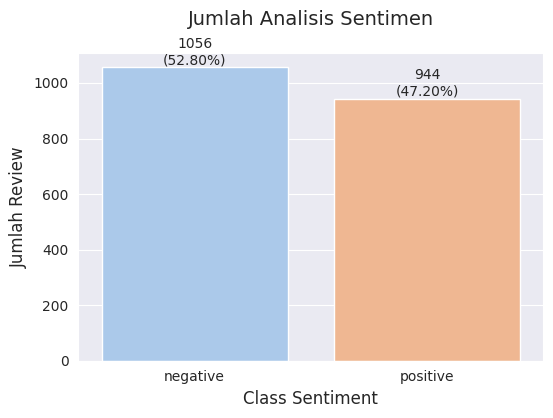

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'label' not in my_df.columns:
    my_df['label'] = tweet_polarity

# Menghitung jumlah tiap kategori
Review_Text_count = my_df['label'].value_counts()

# Set style untuk plot
sns.set_style('darkgrid')

# Membuat figure dan axes untuk plot
fig, ax = plt.subplots(figsize=(6, 4))

# Membuat bar plot
ax = sns.barplot(x=Review_Text_count.index, y=Review_Text_count.values, palette='pastel')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Review', fontsize=12)

# Total jumlah data untuk perhitungan persentase
total = len(my_df['label'])

# Menambahkan angka dan persentase pada setiap batang
for i, count in enumerate(Review_Text_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

# Menampilkan plot
plt.show()

In [ ]:
df = pd.read_csv('/content/Labeling_DataLinkAja.csv').dropna()



```
# This is formatted as code
```

# TF-IDF

In [ ]:
print(my_df.columns)

Index(['Username', 'Rating', 'stemming', 'label'], dtype='object')


**Pembagian Data**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming my_df is your DataFrame and 'steaming' is the text column
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(my_df['stemming'])

# Convert the TF-IDF matrix to a DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Add the label column to the TF-IDF DataFrame
X_tfidf_df['label'] = my_df['label']

# Display the shape of the TF-IDF DataFrame
print("TF-IDF DataFrame shape:", X_tfidf_df.shape)

# Display the count of each label
print("Label counts:")
print(X_tfidf_df['label'].value_counts())

TF-IDF DataFrame shape: (2000, 3286)
Label counts:
label
negative    1056
positive     944
Name: count, dtype: int64


**TF-IDF**

In [ ]:
# Assign the TF-IDF DataFrame to df_resampled
df_resampled = X_tfidf_df

# Display the first 2000 rows of the DataFrame
df_resampled.head(2000)

,aapa,aapan,aaya,abal,abalabal,abalterus,abang,abgred,abisin,abmin,...,ye,yesel,yess,yonathan,you,ytidak,yuk,ywang,zonk,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Menyimpan data ke file CSV
df_resampled.to_csv('Labeling_TFIDF.csv', index=False)

print("Data berhasil disimpan ke Labeling_TFIDF.csv")


Data berhasil disimpan ke Labeling_TFIDF.csv


# **Random Search CV**

**Tuning Hyperparameter Menggunakan Metode Randomized Search Cross Validation**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Membaca dataset
df_tfidf = pd.read_csv('Labeling_TFIDF.csv')

# Pastikan kolom 'label' ada
X_tfidf = df_tfidf.drop(columns=['label']).values  # Mengambil semua kolom selain 'label'
y = df_tfidf['label']  # Kolom 'label' sebagai target

# Verifikasi panjang X_tfidf dan y
print("Panjang X_tfidf: ", len(X_tfidf))
print("Panjang y: ", len(y))

# Memastikan panjang X_tfidf dan y konsisten
if len(X_tfidf) != len(y):
    print(f"Data tidak konsisten. Menyelaraskan data.")
    # Jika ada perbedaan, dapat menggunakan kode ini untuk memperbaikinya
    df_tfidf = df_tfidf.dropna()  # Menghapus baris dengan nilai yang hilang
    X_tfidf = df_tfidf.drop(columns=['label']).values
    y = df_tfidf['label']

# Pembagian dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Menyimpan data latih dan data uji untuk digunakan nanti
print(f"Pembagian data selesai: {len(X_train) / len(X_tfidf) * 100:.0f}% untuk training dan {len(X_test) / len(X_tfidf) * 100:.0f}% untuk testing.")

print(f'Jumlah data setelah dropna dan sebelum pembagian: {len(my_df.dropna())}')
print(f'Jumlah data setelah pembagian (training): {len(X_train)}')
print(f'Jumlah data setelah pembagian (testing): {len(X_test)}')
print(y_test.value_counts())

import pandas as pd

# Membuat DataFrame untuk tampilan tabel
#df_train = pd.DataFrame(X_train[:4], columns=df_tfidf.columns[:-1])
#df_train['Label'] = y_train.iloc[:4].values

#df_test = pd.DataFrame(X_test[:3], columns=df_tfidf.columns[:-1])
#df_test['Label'] = y_test.iloc[:3].values

# Filter: hanya tampilkan kolom yang memiliki setidaknya satu nilai non-zero
#df_train_filtered = df_train.loc[:, (df_train != 0).any()]
#df_test_filtered = df_test.loc[:, (df_test != 0).any()]

# Menampilkan hasil
#print("== 3 Training Data ==")
#df_train_filtered.head(5)




Panjang X_tfidf:  2000
Panjang y:  2000
Pembagian data selesai: 70% untuk training dan 30% untuk testing.
Jumlah data setelah dropna dan sebelum pembagian: 2000
Jumlah data setelah pembagian (training): 1400
Jumlah data setelah pembagian (testing): 600
label
negative    323
positive    277
Name: count, dtype: int64


In [ ]:
print("\n== 2 Test Data ==")
df_test_filtered.head(3)


== 2 Test Data ==


,apk,banget,bangus,bikin,cipta,customer,deh,game,kapok,kayak,layak,linkaajhid,live,main,payaah,respek,servic,statement,teleskop,uamg,Label
0,0.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,negative
1,0.594424,0.000000,0.0,0.259898,0.381979,0.00000,0.000000,0.381979,0.000000,0.000000,0.000000,0.175255,0.000000,0.402622,0.00000,0.000000,0.000000,0.252716,0.000000,0.174964,positive
2,0.000000,0.222534,0.0,0.000000,0.000000,0.21647,0.365286,0.000000,0.376174,0.277714,0.238661,0.000000,0.299675,0.000000,0.32389,0.247668,0.194351,0.000000,0.448077,0.000000,positive


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Menentukan parameter untuk RandomizedSearchCV
param_grid = [
    {'C': [1, 1.5], 'kernel': ['linear']},  # Linear SVM (no gamma, no degree, no coef0)
    {'C': [1, 5, 10, 50, 100], 'gamma': [0.1, 0.01, 0.001, 'scale'], 'kernel': ['rbf']},  # RBF (no coef0)
    {'C': [1, 5, 10, 50], 'gamma': [0.1, 0.01, 'scale'], 'degree': [2, 3], 'coef0': [0.0, 0.5, 1.0], 'kernel': ['poly']},  # Polynomial SVM
    {'C': [1, 5, 10, 50], 'gamma': [0.1, 0.01, 'scale'], 'coef0': [0.0, 0.5, 1.0], 'kernel': ['sigmoid']}  # Sigmoid SVM
]

# Membuat objek model SVM dan RandomizedSearchCV
svm = SVC()
random_search = RandomizedSearchCV(
    svm,
    param_distributions=param_grid,
    n_iter=20,  # Coba 20 kombinasi parameter
    cv=3,  # k-fold cross-validation
    random_state=42,
    n_jobs=-1  # Memanfaatkan semua core CPU
)

# Melatih model dengan RandomizedSearchCV pada data latih
random_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari RandomizedSearchCV
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Menampilkan cross-validation scores untuk setiap kernel secara terpisah
print("\nCross-validation scores for each kernel:")

# Menyaring hasil berdasarkan kernel
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Menampilkan hasil cross-validation untuk setiap kernel
for kernel in kernels:
    print(f"\nResults for '{kernel}' kernel:")
    for mean_score, params in zip(random_search.cv_results_['mean_test_score'], random_search.cv_results_['params']):
        if params['kernel'] == kernel:
            print(f"Parameters: {params} | Cross-validation score: {mean_score}")

Best parameters found:  {'kernel': 'poly', 'gamma': 'scale', 'degree': 2, 'coef0': 1.0, 'C': 1}
Best cross-validation score:  0.8564376150695548

Cross-validation scores for each kernel:

Results for 'linear' kernel:

Results for 'rbf' kernel:
Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 100} | Cross-validation score: 0.8521503646996473
Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 1} | Cross-validation score: 0.5235714526411238

Results for 'poly' kernel:
Parameters: {'kernel': 'poly', 'gamma': 0.1, 'degree': 3, 'coef0': 1.0, 'C': 5} | Cross-validation score: 0.8535809798641681
Parameters: {'kernel': 'poly', 'gamma': 0.1, 'degree': 2, 'coef0': 0.0, 'C': 5} | Cross-validation score: 0.5578709873082685
Parameters: {'kernel': 'poly', 'gamma': 0.1, 'degree': 3, 'coef0': 0.5, 'C': 1} | Cross-validation score: 0.679281812806916
Parameters: {'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'coef0': 1.0, 'C': 5} | Cross-validation score: 0.7714431445350195
Parameters: {'kernel': 'poly'

In [ ]:
gamma_value = 1 / (X_train.shape[1] * np.var(X_train, axis=0).mean())
print("Gamma (scale) computed value:", gamma_value)

Gamma (scale) computed value: 1.0208216071964937


# **EVALUASI MODEL**

**KERNEL LINEAR**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Latih dan prediksi untuk kernel Linear
model_linear = SVC(kernel='linear', C=1)
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

def evaluation_single_kernel(y_test, y_pred, model_name):
    # Membuat confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])

    # Extract TN, FP, FN, TP
    TN, FP, FN, TP = cm.ravel()

    # Menampilkan confusion matrix dalam bentuk teks
    print(f"Confusion Matrix - {model_name}:")
    print(f"[[{TN} {FP}]")
    print(f" [{FN} {TP}]]\n")

    # Print Classification Report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, labels=['negative', 'positive']))

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label="positive")
    recall = recall_score(y_test, y_pred, pos_label="positive")
    f1 = f1_score(y_test, y_pred, pos_label="positive")

    # Print hasil dengan TP, TN, FP, FN
    print(f"{model_name} Evaluation Metrics:")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("="*50)

# Evaluasi model Linear
evaluation_single_kernel(y_test, y_pred_linear, "SVM Linear")

# Extract weights (w) and bias (b)
weights = model_linear.coef_  # Shape: (1, num_features)
bias = model_linear.intercept_  # Single value

print("Weight values:\n", weights)
print("Bias value:\n", bias)

Confusion Matrix - SVM Linear:
[[299 24]
 [45 232]]

Classification Report for SVM Linear:
              precision    recall  f1-score   support

    negative       0.87      0.93      0.90       323
    positive       0.91      0.84      0.87       277

    accuracy                           0.89       600
   macro avg       0.89      0.88      0.88       600
weighted avg       0.89      0.89      0.88       600

SVM Linear Evaluation Metrics:
True Positives (TP): 232
True Negatives (TN): 299
False Positives (FP): 24
False Negatives (FN): 45
Accuracy: 0.8850
Precision: 0.9062
Recall: 0.8375
F1-Score: 0.8705
Weight values:
 [[ 0.          0.          0.         ...  0.18853485 -0.32348733
   0.23881788]]
Bias value:
 [-0.52651845]


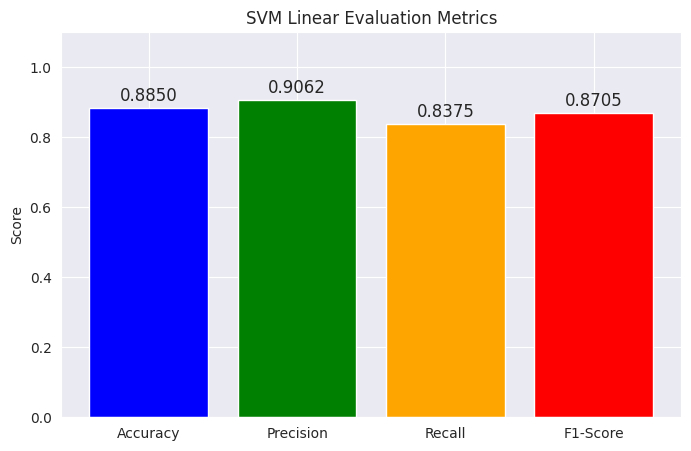

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_linear)
precision = precision_score(y_test, y_pred_linear, pos_label="positive")
recall = recall_score(y_test, y_pred_linear, pos_label="positive")
f1 = f1_score(y_test, y_pred_linear, pos_label="positive")

# Metrics labels and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.4f}', ha='center', fontsize=12)

# Customize plot
plt.ylim(0, 1.1)  # Ensure all metrics fit in the chart
plt.ylabel("Score")
plt.title("SVM Linear Evaluation Metrics")
plt.show()

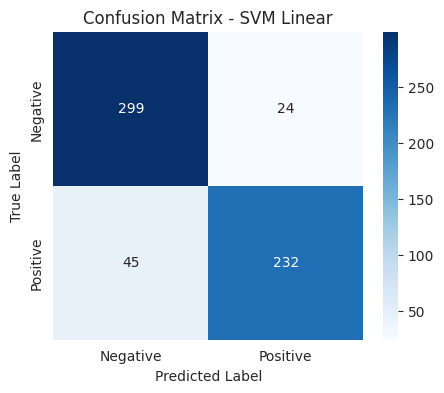

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_linear, labels=['negative', 'positive'])

# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM Linear")

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Convert to DataFrame if not already
df_test = pd.DataFrame(X_test)
df_test['label'] = y_test  # Append target labels

# Convert X_test to DataFrame (if it's not already)
X_test_df = pd.DataFrame(X_test, columns=[f'Feature_{i}' for i in range(X_test.shape[1])])

# Add actual and predicted labels
X_test_df['Actual Label'] = y_test.values  # Ensure y_test is a Series or array
X_test_df['Predicted Label'] = y_pred_linear

print("Checking if X_test contains only zeros:", (X_test == 0).all().all())
print("Unique values in X_test:\n", pd.DataFrame(X_test).nunique())


Checking if X_test contains only zeros: False
Unique values in X_test:
 0       2
1       2
2       2
3       1
4       1
       ..
3280    1
3281    3
3282    1
3283    1
3284    1
Length: 3285, dtype: int64


In [ ]:
import pandas as pd

# Convert to DataFrame if not already
df_test = pd.DataFrame(X_test)
df_test['label'] = y_test  # Append target labels

print("Test Data Sample:")
df_test.head()  # Display first few rows




Test Data Sample:


,0,1,2,3,4,5,6,7,8,9,...,3276,3277,3278,3279,3280,3281,3282,3283,3284,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


**KERNEL RBF**

In [ ]:
# Latih dan prediksi untuk kernel RBF
model_rbf = SVC(kernel='rbf', C=100, gamma=0.01)
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)

# Evaluasi model RBF
evaluation_single_kernel(y_test, y_pred_rbf, "SVM RBF")

Confusion Matrix - SVM RBF:
[[391 40]
 [59 310]]

Classification Report for SVM RBF:
              precision    recall  f1-score   support

    negative       0.87      0.91      0.89       431
    positive       0.89      0.84      0.86       369

    accuracy                           0.88       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.88      0.88      0.88       800

SVM RBF Evaluation Metrics:
True Positives (TP): 310
True Negatives (TN): 391
False Positives (FP): 40
False Negatives (FN): 59
Accuracy: 0.8762
Precision: 0.8857
Recall: 0.8401
F1-Score: 0.8623


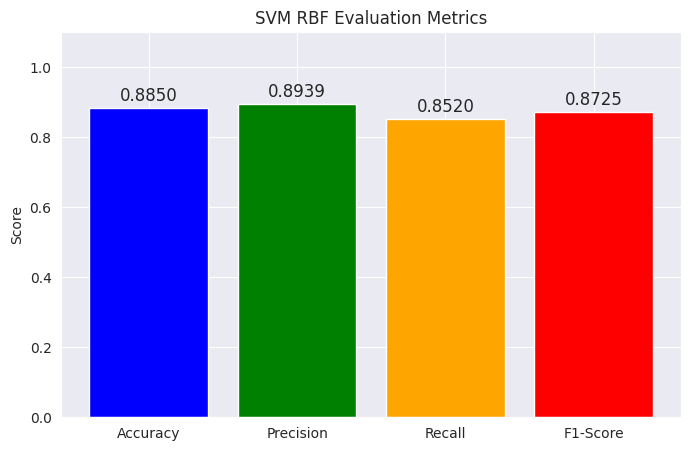

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rbf)
precision = precision_score(y_test, y_pred_rbf, pos_label="positive")
recall = recall_score(y_test, y_pred_rbf, pos_label="positive")
f1 = f1_score(y_test, y_pred_rbf, pos_label="positive")

# Metrics labels and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.4f}', ha='center', fontsize=12)

# Customize plot
plt.ylim(0, 1.1)  # Ensure all metrics fit in the chart
plt.ylabel("Score")
plt.title("SVM RBF Evaluation Metrics")
plt.show()

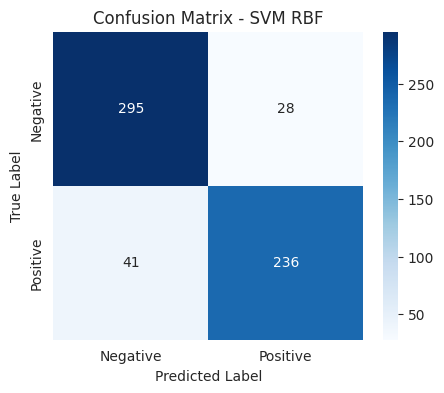

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf, labels=['negative', 'positive'])

# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM RBF")

# Show plot
plt.show()

**KERNEL POLYNOMIAL**

In [ ]:
# Latih dan prediksi untuk kernel Polynomial
model_poly = SVC(kernel='poly', C=1,  gamma=1.0, coef0=1.0, degree=2)
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

# Evaluasi model Polynomial
evaluation_single_kernel(y_test, y_pred_poly, "SVM Polynomial")


Confusion Matrix - SVM Polynomial:
[[388 43]
 [68 301]]

Classification Report for SVM Polynomial:
              precision    recall  f1-score   support

    negative       0.85      0.90      0.87       431
    positive       0.88      0.82      0.84       369

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800

SVM Polynomial Evaluation Metrics:
True Positives (TP): 301
True Negatives (TN): 388
False Positives (FP): 43
False Negatives (FN): 68
Accuracy: 0.8612
Precision: 0.8750
Recall: 0.8157
F1-Score: 0.8443


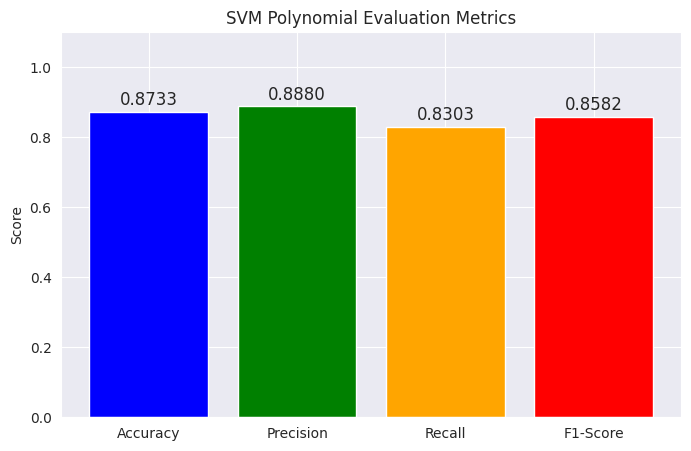

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_poly)
precision = precision_score(y_test, y_pred_poly, pos_label="positive")
recall = recall_score(y_test, y_pred_poly, pos_label="positive")
f1 = f1_score(y_test, y_pred_poly, pos_label="positive")

# Metrics labels and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.4f}', ha='center', fontsize=12)

# Customize plot
plt.ylim(0, 1.1)  # Ensure all metrics fit in the chart
plt.ylabel("Score")
plt.title("SVM Polynomial Evaluation Metrics")
plt.show()

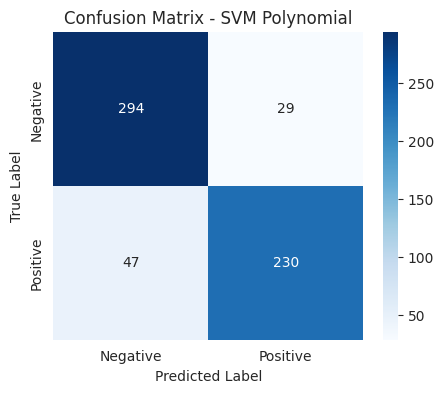

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_poly, labels=['negative', 'positive'])

# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM Polynomial")

# Show plot
plt.show()

**KERNEL SIGMOID**

In [ ]:
# Latih dan prediksi untuk kernel Sigmoid
model_sigmoid = SVC(kernel='sigmoid', C=10, gamma=0.1, coef0=0.5)
model_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = model_sigmoid.predict(X_test)

# Evaluasi model Sigmoid
evaluation_single_kernel(y_test, y_pred_sigmoid, "SVM Sigmoid")


Confusion Matrix - SVM Sigmoid:
[[396 35]
 [82 287]]

Classification Report for SVM Sigmoid:
              precision    recall  f1-score   support

    negative       0.83      0.92      0.87       431
    positive       0.89      0.78      0.83       369

    accuracy                           0.85       800
   macro avg       0.86      0.85      0.85       800
weighted avg       0.86      0.85      0.85       800

SVM Sigmoid Evaluation Metrics:
True Positives (TP): 287
True Negatives (TN): 396
False Positives (FP): 35
False Negatives (FN): 82
Accuracy: 0.8538
Precision: 0.8913
Recall: 0.7778
F1-Score: 0.8307


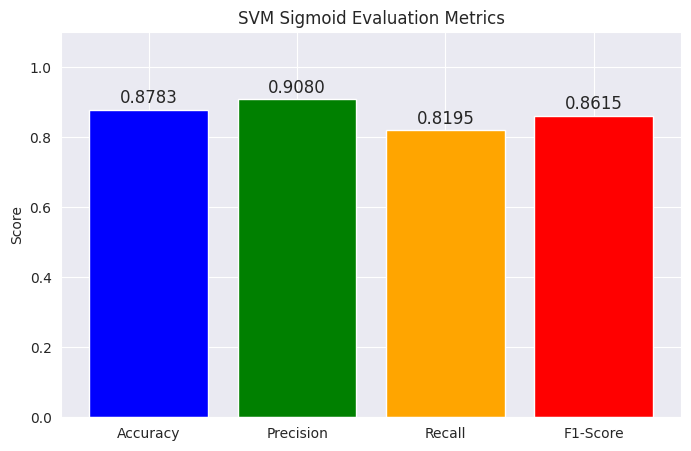

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_sigmoid)
precision = precision_score(y_test, y_pred_sigmoid, pos_label="positive")
recall = recall_score(y_test, y_pred_sigmoid, pos_label="positive")
f1 = f1_score(y_test, y_pred_sigmoid, pos_label="positive")

# Metrics labels and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.4f}', ha='center', fontsize=12)

# Customize plot
plt.ylim(0, 1.1)  # Ensure all metrics fit in the chart
plt.ylabel("Score")
plt.title("SVM Sigmoid Evaluation Metrics")
plt.show()

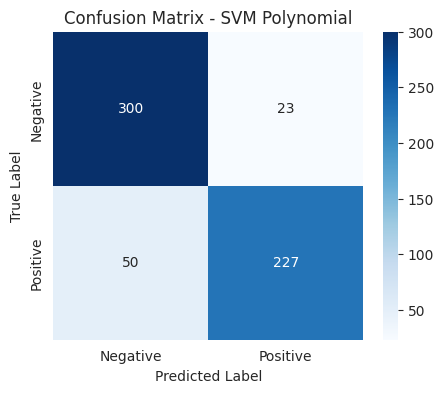

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_sigmoid, labels=['negative', 'positive'])

# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM Polynomial")

# Show plot
plt.show()

In [ ]:
print(my_df.columns)

Index(['Username', 'Rating', 'steaming', 'label'], dtype='object')


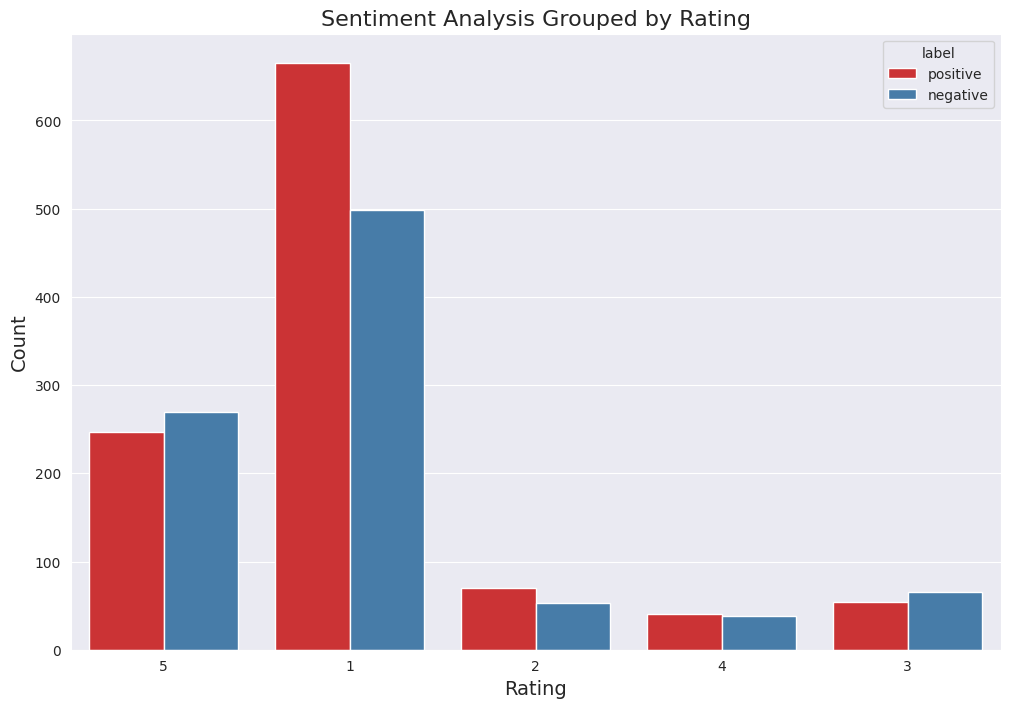

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menambahkan kolom sentimen ke DataFrame
results = pd.DataFrame({
    "steaming": my_df['steaming'],
    "label": tweet_polarity,  # Menambahkan label hasil analisis
    "weight": tweet_weight,  # Menambahkan weight hasil analisis
    "Rating": my_df['Rating']
})

plt.figure(figsize=(12, 8))

# Barplot untuk distribusi sentimen berdasarkan rating
sns.countplot(x='Rating', hue='label', data=results, palette='Set1')

# Menambahkan judul dan label sumbu
plt.title('Sentiment Analysis Grouped by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Menampilkan diagra, dan menyimpannya
plt.savefig('sentiment_analysis_grouped_by_rating.png')
plt.show()

ROC AUC Score for Kernel 'linear': 0.950
ROC AUC Score for Kernel 'poly': 0.887
ROC AUC Score for Kernel 'rbf': 0.944
ROC AUC Score for Kernel 'sigmoid': 0.946


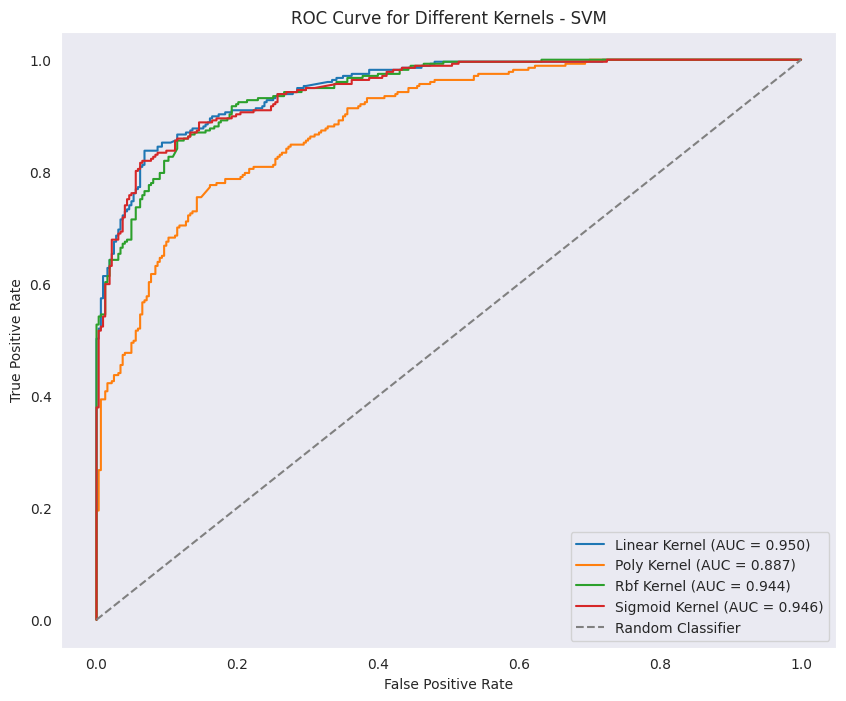


Confusion Matrix:
[[299  24]
 [ 45 232]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       323
           1       0.91      0.84      0.87       277

    accuracy                           0.89       600
   macro avg       0.89      0.88      0.88       600
weighted avg       0.89      0.89      0.88       600



In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Transformasi label menjadi numerik
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Konversi label y_train
y_test_encoded = label_encoder.transform(y_test)        # Konversi label y_test

# Daftar kernel yang akan digunakan
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Inisialisasi figure untuk plotting ROC Curve
plt.figure(figsize=(10, 8))

# Iterasi untuk setiap kernel
for kernel in kernels:
    # Inisialisasi model dengan kernel saat ini
    model = SVC(kernel=kernel, probability=True)
    model.fit(X_train, y_train_encoded)

    # Prediksi probabilitas
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Hitung ROC AUC Score
    roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
    print(f"ROC AUC Score for Kernel '{kernel}': {roc_auc:.3f}")

    # Hitung ROC Curve
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{kernel.capitalize()} Kernel (AUC = {roc_auc:.3f})")

# Tambahkan diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")

# Tambahkan label, judul, dan legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Kernels - SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Evaluasi model menggunakan kernel 'linear' sebagai contoh
model_linear = SVC(kernel='linear', probability=True)
model_linear.fit(X_train, y_train_encoded)

# Prediksi
y_pred_linear = model_linear.predict(X_test)

# Evaluasi dengan confusion matrix dan classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_linear))

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_linear))

# WORDCLOUD

In [ ]:
import pandas as pd

my_df = pd.read_csv('/content/Labeling_DataLinkAja.csv')
my_df.head()

,stemming,label,weight,Rating
0,"mantap, kali",positive,5 + 0 = 5,5
1,"kecewa, link, isi, saldo, tanggal, kematin, ku...",positive,0 + 0 + -2 + 2 + 0 + 0 + -3 + 0 + 0 + 3 + 3 + ...,1
2,"live, chat, guna, ganti, nomor, aplikasiiii, m...",negative,3 + 3 + 1 + -3 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0...,1
3,"daftar, kirim, kode, verifikasi, email, email,...",positive,-1 + 2 + 0 + 0 + 0 + 0 + 2 + 0 = 3,1
4,"aplikasi, sampah",negative,0 + 0 = 0,1


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#pisahkan dataset berdasarkan sentimen
sentimen_negatif = my_df[my_df['label'] == 'negative']['stemming'].str.cat(sep=' ')
sentimen_positif = my_df[my_df['label'] == 'positive']['stemming'].str.cat(sep=' ')

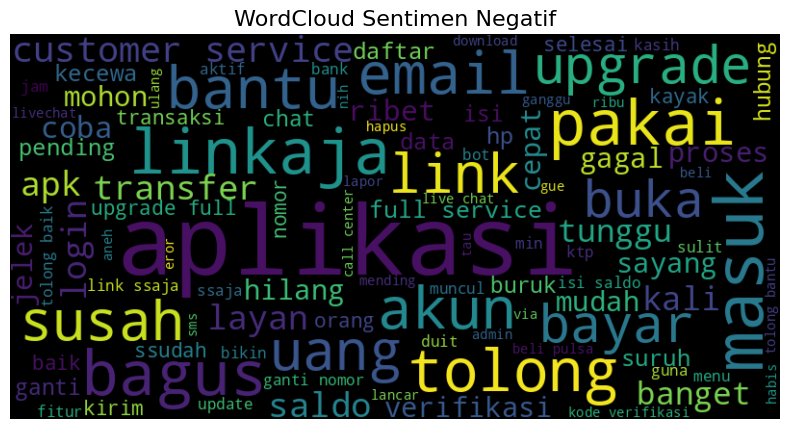

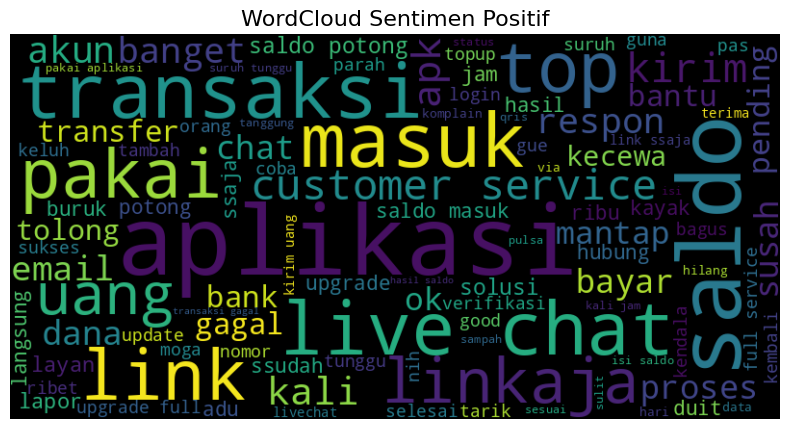

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800, height=400,
        max_words=100,  # Limit to the 50 most frequent words
        random_state=0,
        max_font_size=100,
        background_color='black'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

#membuat wordcloud sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')
#membuat wordcloud sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

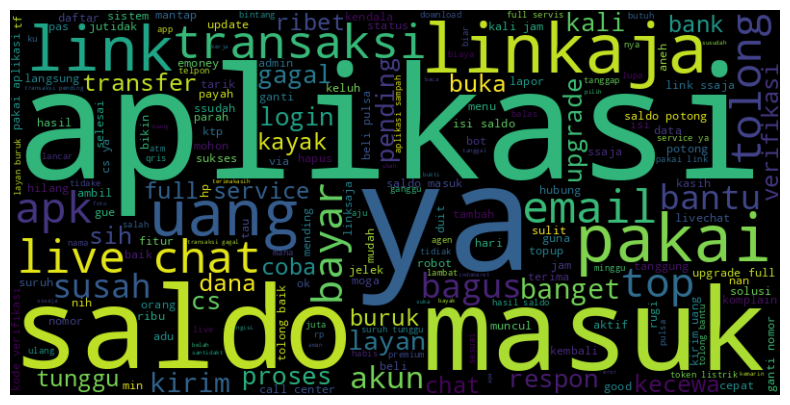

<Figure size 640x480 with 0 Axes>

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(my_df['steaming'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('WordCloud LinkAja.png')

# Rating

In [ ]:
import pandas as pd

my_df = pd.read_csv('/content/Labeling_DataLinkAja.csv')

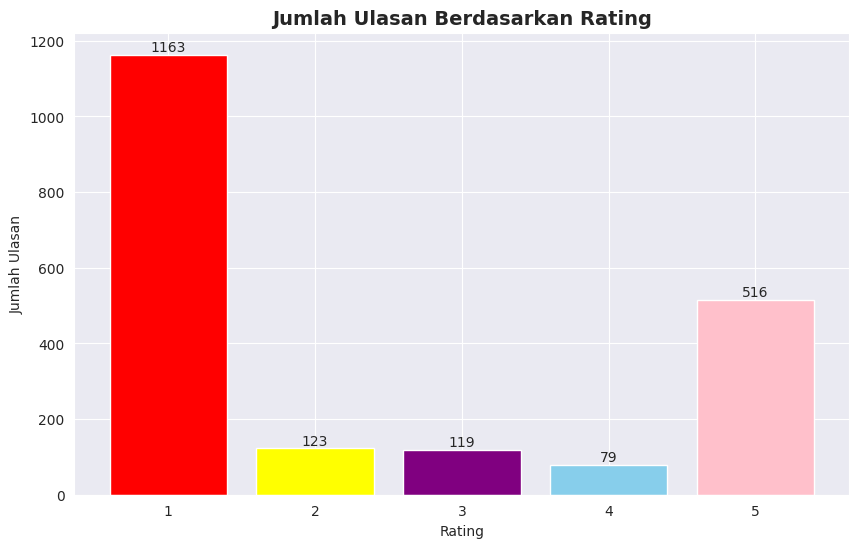

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

rating_counts = my_df['Rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['red', 'yellow', 'purple', 'skyblue', 'pink']

plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Ulasan Berdasarkan Rating', fontsize=14, fontweight='bold')  # Perbaikan di sini
plt.xlabel('Rating')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.show()
plt.savefig('JUMLAH ULASAN BERDASARKAN RATING.png')